In [5]:
pip install snowflake-snowpark-python pandas scikit-learn scipy numpy matplotlib

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



  Obtaining dependency information for snowflake-snowpark-python from https://files.pythonhosted.org/packages/54/67/304fdf26a533156d53dbad066feb0cf51a353c50745732b5b8330f28bd2f/snowflake_snowpark_python-1.34.0-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/148.4 kB ? eta -:--:--
     ------- ----------------------------- 30.7/148.4 kB 445.2 kB/s eta 0:00:01
     ------------------------ -------------- 92.2/148.4 kB 1.1 MB/s eta 0:00:01
     -------------------------------------- 148.4/148.4 kB 1.3 MB/s eta 0:00:00
  Obtaining dependency information for snowflake-connector-python<4.0.0,>=3.14.0 from https://files.pythonhosted.org/packages/5e/11/e70896521ff209969fbe75d0811182f9b59ab84b00951aaa4d2a4b5854a2/snowflake_connector_python-3.16.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/73.2 kB ? eta -:--:--
     ---------------------------------------- 73.2/73.2 kB 2.0 MB/s eta 0:00:00
  Obtaining dependency information f

In [2]:
import snowflake.snowpark
import pandas as pd
import sklearn
import scipy
import numpy as np
import matplotlib
print("Libraries good!")

Libraries good!


In [1]:
pip install snowflake-connector-python snowflake-sqlalchemy sqlalchemy


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Obtaining dependency information for snowflake-sqlalchemy from https://files.pythonhosted.org/packages/98/9b/2eb13e877636311122602c3c0efa20cb0b1233dbc460803f30b8fd294999/snowflake_sqlalchemy-1.7.6-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/70.5 kB ? eta -:--:--
   ---------------------------------- ----- 61.4/70.5 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 70.5/70.5 kB 1.3 MB/s eta 0:00:00


In [9]:
pip install --upgrade snowflake-connector-python snowflake-snowpark-python


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [22]:
from snowflake.snowpark import Session

connection_parameters = {
    "account": "UE17324.eu-west-2.aws",  # e.g., xy12345.us-east-1
    "user": "Dhanush1054",
    "password": "Dhanush@1054851",
    "role": "SYSADMIN",
    "warehouse": "COMPUTE_WH",
    "database": "ecommerce_db",
    "schema": "analytics"
}
session = Session.builder.configs(connection_parameters).create()
print("Connected to Snowflake!")

Connected to Snowflake!


In [23]:
from snowflake.snowpark.functions import col, datediff, count, sum, max, current_date

# Load data from customer_data table
df = session.table("customer_data")
df = df.with_column("TotalSpend", col("Quantity") * col("UnitPrice"))

In [24]:
print(rfm_pandas.columns)


Index(['CUSTOMERID', 'RECENCY', 'FREQUENCY', 'MONETARY', 'cluster', 'Cluster'], dtype='object')


In [25]:
# Check date range
df = session.table("customer_data")
min_date = df.selectExpr("MIN(InvoiceDate) AS min_date").collect()[0]["MIN_DATE"]
max_date = df.selectExpr("MAX(InvoiceDate) AS max_date").collect()[0]["MAX_DATE"]
print(f"Earliest date: {min_date}, Latest date: {max_date}")

Earliest date: 2010-12-01 08:26:00, Latest date: 2011-12-09 12:50:00


In [26]:
from snowflake.snowpark.functions import col, datediff, count, sum, lit, max as sf_max

max_date = "2011-12-09"

df = session.table("customer_data")
df = df.filter(col("CustomerID").is_not_null())  # Remove null CustomerIDs
df = df.with_column("TotalSpend", col("Quantity") * col("UnitPrice"))




In [27]:
rfm_df = df.group_by("CustomerID").agg(
    datediff("day", sf_max(col("InvoiceDate")), lit(max_date)).alias("Recency"),
    count("InvoiceNo").alias("Frequency"),
    sum("TotalSpend").alias("Monetary")
)

rfm_df.write.save_as_table("rfm_data", mode="overwrite")

print(rfm_df.limit(10).to_pandas())

  CUSTOMERID  RECENCY  FREQUENCY  MONETARY
0      14505       17        803   5818.70
1      17841        1       7983  40340.78
2      13591       64         58   1117.13
3      15862        8        147    832.88
4      15394        9         85   2183.54
5      17980      165         30    811.45
6      14859       12         59   1352.04
7      14733        9        216   9451.54
8      15791       43         76   1604.44
9      16966        8         31   2148.47


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


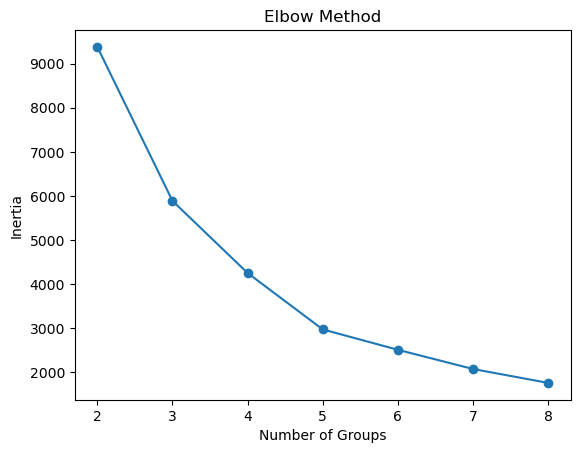

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.5693359181581982
  CUSTOMERID  RECENCY  FREQUENCY  MONETARY  cluster  Cluster
0      14505       17        803   5818.70        0        0
1      17841        1       7983  40340.78        3        3
2      13591       64         58   1117.13        0        0
3      15862        8        147    832.88        0        0
4      15394        9         85   2183.54        0        0
5      17980      165         30    811.45        1        1
6      14859       12         59   1352.04        0        0
7      14733        9        216   9451.54        0        0
8      15791       43         76   1604.44        0        0
9      16966        8         31   2148.47        0        0


In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Reload and clean RFM data
rfm_df = session.table("rfm_data")
rfm_df = rfm_df.filter(col("CustomerID").is_not_null())
rfm_df = rfm_df.filter((col("Frequency") < 10000) & (col("Monetary") < 100000))
rfm_pandas = rfm_df.to_pandas()

# K-Means with corrected data
X = rfm_pandas[["RECENCY", "FREQUENCY", "MONETARY"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_pandas["cluster"] = kmeans.fit_predict(X_scaled)

# Draw a picture to pick the best number of groups
plt.plot(range(2, 9), inertias, marker="o")
plt.xlabel("Number of Groups")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

# Choose 4 groups (or adjust based on the picture)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_pandas["Cluster"] = kmeans.fit_predict(X_scaled)


# Check quality
score = silhouette_score(X_scaled, rfm_pandas["cluster"])
print(f"Silhouette Score: {score}")

# Save to Snowflake (overwrite old customer_segments)
session.write_pandas(rfm_pandas, "customer_segments", auto_create_table=True, overwrite=True)
print(rfm_pandas.head(10))



In [29]:
print(rfm_pandas["Cluster"].value_counts())


Cluster
0    3223
1    1108
2      32
3       3
Name: count, dtype: int64


In [30]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

X = rfm_pandas[["RECENCY", "FREQUENCY", "MONETARY"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_pandas["cluster"] = kmeans.fit_predict(X_scaled)
score = silhouette_score(X_scaled, rfm_pandas["cluster"])
print(f"Silhouette Score: {score}")

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.5693359181581982
